In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

DF = pd.read_csv("/content/predictive_maintenance_nn.csv")
print(DF)

DF.shape

    Air_temperature  Process_temperature  Rotational_speed  Target  \
0             295.7                306.2              2270       1   
1             295.8                306.3              1235       1   
2             295.3                305.7              1473       0   
3             295.4                305.9              1518       0   
4             296.3                307.2              1319       1   
5             296.4                307.4              2833       1   
6             295.4                305.8              1526       0   
7             295.4                305.8              1407       0   
8             295.5                306.1              1650       0   
9             295.6                306.2              1584       0   
10            297.5                308.1              1334       1   
11            297.6                309.6              1501       1   
12            297.7                308.5              1373       1   
13            297.8 

(29, 5)

In [2]:
# DF.drop([], axis=1)
DF.drop(columns=['Failure_Type'], inplace=True)
DF.shape

(29, 4)

In [5]:
DF.head()

,Air_temperature,Process_temperature,Rotational_speed,Target
0,295.7,306.2,2270,1
1,295.8,306.3,1235,1
2,295.3,305.7,1473,0
3,295.4,305.9,1518,0
4,296.3,307.2,1319,1


In [ ]:
y = np.array(DF.iloc[:,-1]).T
y = np.array([y]).T
# print("y is\n", y)

In [6]:
## Normalize the data (not the label!)
## or min/max
## normalized_df=(df-df.min())/(df.max()-df.min())

DF=DF.iloc[:, [0, 1, 2]]
DF=(DF-DF.mean())/DF.std()
print(DF)
X = np.array(DF)
# print("X is\n", X)


    Air_temperature  Process_temperature  Rotational_speed
0         -0.756038            -0.837934          1.476756
1         -0.726208            -0.797299         -0.919181
2         -0.875359            -1.041112         -0.368231
3         -0.845529            -0.959841         -0.264060
4         -0.577058            -0.431578         -0.724728
5         -0.547228            -0.350307          2.780053
6         -0.845529            -1.000477         -0.245541
7         -0.845529            -1.000477         -0.521016
8         -0.815698            -0.878570          0.041509
9         -0.785868            -0.837934         -0.111276
10        -0.219097            -0.065858         -0.690004
11        -0.189267             0.543676         -0.303414
12        -0.159437             0.096685         -0.599723
13        -0.129607            -0.390943         -0.706209
14        -0.696378            -0.675392          0.106326
15        -0.696378            -0.716027         -0.0881

In [ ]:
## Set y to the label. Check the shape!
InputColumns = 3
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

LR=.01
LRB = .01
#................................................

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork(object):
    def __init__(self):
        
        self.InputNumColumns = InputColumns  
        self.OutputSize = 1 
        self.HiddenUnits = 3  
        self.n = n  
        
        # print("Initialize NN\n")
        #Random W1
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
       
        # print("INIT W1 is\n", self.W1)
              
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
        # print("W2 is:\n", self.W2)
        
        self.b = np.random.randn(1, self.HiddenUnits)
        # print("The b's are:\n", self.b)
        ## biases for layer 1
        
        self.c = np.random.randn(1, self.OutputSize)
        # print("The c is\n", self.c)
        ## bias for last layer
        
        
    def FeedForward(self, X):
        # print("FeedForward\n\n")
        self.z = (np.dot(X, self.W1)) + self.b 
        #X is n by c   W1  is c by h -->  n by h
        # print("Z1 is:\n", self.z)
        
        self.h = self.Sigmoid(self.z) #activation function    shape: n by h
        # print("H is:\n", self.h)
        
        self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
        # print("Z2 is:\n", self.z2)
        
        ## Using Softmax for the output activation
        output = self.Sigmoid(self.z2)  
        # print("output Y^ is:\n", output)
        return output
        
    def Sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))

    def BackProp(self, X, y, output):
        # print("\n\nBackProp\n")
        self.LR = LR
        self.LRB=LRB  ## LR for biases
        
        # Y^ - Y
        self.output_error = output - y    
        # print("Y^ - Y\n", self.output_error)
        
        self.output_delta = self.output_error 
          
        ##(Y^ - Y)(W2)
        self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
        
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 

        self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) ## this is dW1
        
        ## (H)T (Y^ - Y) - 
        self.h_output_delta = self.h.T.dot(self.output_delta) ## this is for dW2

        # print("Using sum gradient........\n")
        self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
        self.W2 = self.W2 - self.LR*(self.h_output_delta) 
        
        
        print("The sum of the b update is\n", np.mean(self.H_D_Error_W2, axis=0))
        print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LRB*np.mean(self.H_D_Error_W2, axis=0)
        #print("The H_D_Error_W2 is...\n", self.H_D_Error_W2)
        print("Updated bs are:\n", self.b)
        
        self.c = self.c - self.LR*np.mean(self.output_delta, axis=0)
        #print("Updated c's are:\n", self.c)
        
        print("The W1 is: \n", self.W1)
        print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W1 gradient average is: \n", self.X_H_D_Error_W2/self.n)
        print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The W2 gradient average is: \n", self.h_output_delta/self.n)
        print("The biases b gradient is:\n",np.mean(self.H_D_Error_W2, axis=0 ))
        print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))
        ################################################################
        
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        # print("Output in TNN\n", output)
        self.BackProp(X, y, output)
        return output

#-------------------------------------------------------------------        


In [ ]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=125

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    # print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    # print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    # print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)
    



RUN:
  0
The sum of the b update is
 [0.0353159  0.13986796 0.14865783]
The b biases before the update are:
 [[-0.18261125 -0.67317763  0.04706044]]
Updated bs are:
 [[-0.18296441 -0.67457631  0.04557386]]
The W1 is: 
 [[-0.78844571 -0.44157535 -0.24329369]
 [-2.62270796  0.14210698 -0.32708958]
 [-1.18362469 -2.35772911 -1.38048495]]
The W1 gradient is: 
 [[-0.62156471 -3.08798506 -3.28731882]
 [-0.61587025 -3.29467513 -3.46154226]
 [-0.23179148 -0.51829165 -0.49157852]]
The W2 gradient  is: 
 [[10.10938587]
 [ 5.21591527]
 [ 7.36030606]]
The biases b gradient is:
 [0.0353159  0.13986796 0.14865783]
The bias c gradient is: 
 [0.3237595]

RUN:
  1
The sum of the b update is
 [0.03141656 0.1327038  0.14193681]
The b biases before the update are:
 [[-0.18296441 -0.67457631  0.04557386]]
Updated bs are:
 [[-0.18327857 -0.67590335  0.04415449]]
The W1 is: 
 [[-0.78287024 -0.41222402 -0.2117333 ]
 [-2.61715291  0.17349978 -0.293762  ]
 [-1.18142333 -2.35271189 -1.37551698]]
The W1 gradient

[[13  4]
 [ 1 11]]


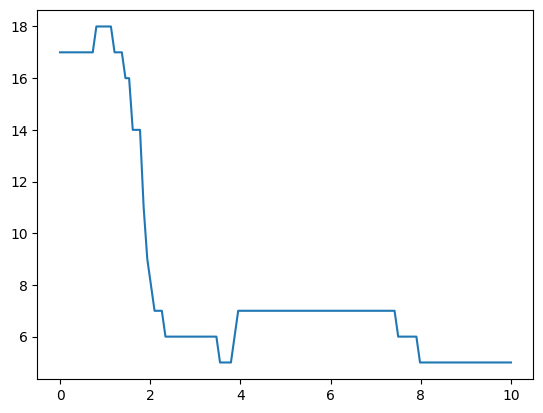

In [ ]:
###################-output and vis----------------------    
#print("Total Loss List:", TotalLoss) 
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    

print(confusion_matrix(output, y))


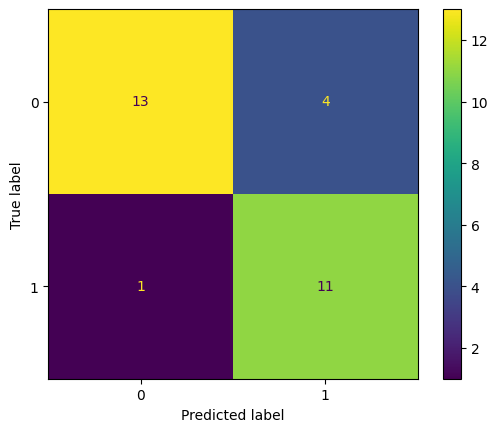

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

##########################################################
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

levels = np.unique(y)
levels

cm = confusion_matrix(output, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=levels)                         
disp.plot()
plt.show()
     

<Axes: >

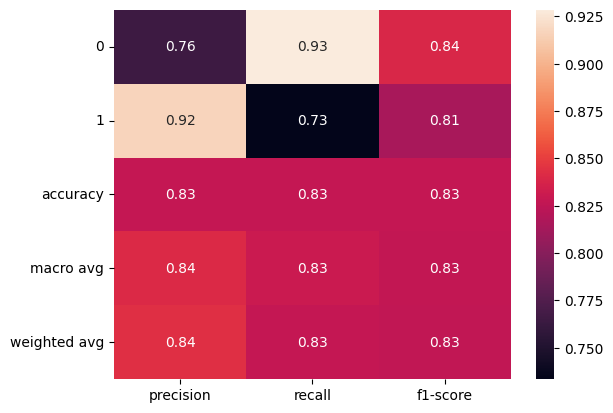

In [ ]:

from sklearn.metrics import classification_report

clf_report = classification_report(y,
                                   output,
                                   labels=levels,
                                   output_dict=True)

# clf_report
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


In [ ]:
last_epochs = 5
for i in range(Epochs):
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    # print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    # print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    # print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)
    
    if i >= Epochs - last_epochs:
        print("The current average loss is\n", loss)



RUN:
  0
The sum of the b update is
 [ 0.00861909  0.00026687 -0.00859116]
The b biases before the update are:
 [[-0.19143203 -0.69654687  0.02695616]]
Updated bs are:
 [[-0.19151822 -0.69654954  0.02704207]]
The W1 is: 
 [[-0.72566311  0.33643797  0.8584481 ]
 [-2.60760252  1.06865187  0.9052169 ]
 [-1.36008898 -2.62454759 -1.05795234]]
The W1 gradient is: 
 [[-0.08891571 -0.18367994 -0.54593381]
 [-0.05034799 -0.27947605 -0.62685662]
 [ 0.26109012  0.39742565 -0.29116711]]
The W2 gradient  is: 
 [[ 0.36907442]
 [-0.4692378 ]
 [-0.53851047]]
The biases b gradient is:
 [ 0.00861909  0.00026687 -0.00859116]
The bias c gradient is: 
 [-0.02982293]

RUN:
  1
The sum of the b update is
 [ 0.00860042  0.00022808 -0.00863754]
The b biases before the update are:
 [[-0.19151822 -0.69654954  0.02704207]]
Updated bs are:
 [[-0.19160422 -0.69655182  0.02712844]]
The W1 is: 
 [[-0.72476832  0.33825635  0.86385252]
 [-2.60708934  1.07142345  0.91142419]
 [-1.36270852 -2.6285323  -1.05510274]]
The 